<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE5_RoboticsToolbox.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

# ❄️ ICE5: Robotics Toolbox

**A note on this document**
This document is known as a Jupyter notebook; it is used in academia and industry to allow text and executable code to coexist in a very easy to read format. Blocks can contain text or executable code. To run the executable code in this notebook, click <a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE5_RoboticsToolbox.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>
. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

In [25]:
# import robotics toolbox.
# if you get an error, you need to install roboticstoolbox-python
import roboticstoolbox as rtb

If you fail importing roboticstoolbox, you need to uncomment the following line to install the roboticstoolbox-python package.

In [26]:
#!pip install roboticstoolbox-python # delete "#" and run it.

A revolute joint and link can be created by

In [9]:
import roboticstoolbox as rtb
link = rtb.RevoluteMDH(a=1)
print(link)

RevoluteMDH:   θ=q,  d=0.0,  a=1,  ⍺=0.0


which is a RevoluteMDH object which is a subclass of the generic DHLink object. The displayed value of the object shows the kinematic parameters (most of which have defaulted to zero), the joint type and the _modified_ Denavit-Hartenberg (MDH) convention is used (the tag _RevoluteMDH_).

A Link object has many parameters and methods which are described in the documentation in 
https://petercorke.github.io/robotics-toolbox-python/intro.html#robotics-toolbox
https://github.com/petercorke/robotics-toolbox-python

The link transform for $\theta=\pi/2$ rad is

In [11]:
from numpy import pi
link.A(pi/2)  # forward kinematics - pose of the link

   0        -1         0         1         
   1         0         0         0         
   0         0         1         0         
   0         0         0         1         


representing the homogeneous transformation due to this robot link with the particular value of $\theta$.  Various link parameters can be read or altered, for example,

In [12]:
link.isprismatic

False

In [13]:
link.isrevolute

True

indicate that the link is revolute and

In [14]:
link.a

1

returns the link length, $a$.  Finally a link can contain an offset

In [16]:
link.offset = pi/4
link.A(pi/4)

   0        -1         0         1         
   1         0         0         0         
   0         0         1         0         
   0         0         0         1         


which is added to the joint variable before computing the link transformation. The joint coordinate offset provides a mechanism to set an arbitrary configuration for the zero joint coordinate case. The offset is added to the user specified joint angle before any kinematic or dynamic function is invoked. 


Shown below is the 3 DoF revolute-prismatic-revolute (RPR) robotic arm we discussed in Lesson 19.

```{image} ./figures/RPR.png
:width: 640
:align: center
```

Suppse $L_1 = L_2 = L_3 = 1$.


In [17]:
L1 = 1
L2 = 1
L3 = 1
RPR = rtb.robot.DHRobot(
    [
        rtb.RevoluteMDH(d=L1), 
        rtb.PrismaticMDH(alpha=pi/2, offset=L2),
        rtb.RevoluteMDH(d=L3)        
    ], name='RPR')

print(RPR)

DHRobot: RPR, 3 joints (RPR), dynamics, modified DH parameters
┏━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━━┓
┃aⱼ₋₁ ┃ ⍺ⱼ₋₁  ┃  θⱼ  ┃   dⱼ    ┃
┣━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━━━━┫
┃ 0.0 ┃  0.0° ┃   q1 ┃       1 ┃
┃ 0.0 ┃ 90.0° ┃ 0.0° ┃  q2 + 1 ┃
┃ 0.0 ┃  0.0° ┃   q3 ┃       1 ┃
┗━━━━━┻━━━━━━━┻━━━━━━┻━━━━━━━━━┛



We can now perform standard kinematic operations

In [18]:
qz = [0, 0, 0] # zero angle configuration
T = RPR.fkine(qz) 
print(T)

   1         0         0         0         
   0         0        -1        -2         
   0         1         0         1         
   0         0         0         1         



We can generate plots using the plot method, for example

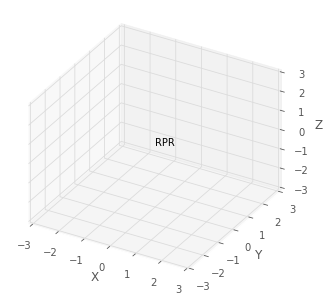

PyPlot3D backend, t = 0.05, scene:
  RPR

<Figure size 432x288 with 0 Axes>

In [27]:
#%matplotlib notebook  
%matplotlib inline
import matplotlib.pyplot as plt
RPR.plot(qz, block=False)

which shows a skeleton of the robot with pipes that connect the link coordinate frames as defined by the Denavit-Hartenberg parameters. The plot method has many options for showing the joint axes, wrist coordinate frame, shadows and so on. Also. we can rotate the figure by holding down the left mouse button.  

We can also animate as the robot moves along multiple configurations. Let's animate the path from the `qz` to `q1` given by 

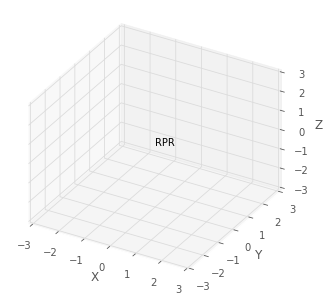

In [ ]:
q1 = [pi/2, 1, 0]
qt = rtb.jtraj(qz, q1, 50) # 50 steps
RPR.plot(qt.q) # qt.q is the trajectory from qz to q1

Shown below is the 3 DoF revolute-revolute-revolute (RRR) robotic arm we discussed in Lesson 19.

```{image} ./figures/RRR.png
:width: 760
:align: center
```


Suppse $L_1 = 0.2$, $ L_2 = 1$ and $L_3 = 0.8$.

In [23]:
from spatialmath import *
L1 = 0.2
L2 = 1
L3 = 0.8
RRR = rtb.robot.DHRobot(
    [ rtb.RevoluteMDH(d=L1), 
      rtb.RevoluteMDH(alpha=pi/2),
      rtb.RevoluteMDH(a=L2)        
    ], name='RRR')
RRR.tool = SE3.Tx(L3)
print(RRR)
print(RRR.tool)

DHRobot: RRR, 3 joints (RRR), dynamics, modified DH parameters
┏━━━━━┳━━━━━━━┳━━━━━┳━━━━━┓
┃aⱼ₋₁ ┃ ⍺ⱼ₋₁  ┃ θⱼ  ┃ dⱼ  ┃
┣━━━━━╋━━━━━━━╋━━━━━╋━━━━━┫
┃ 0.0 ┃  0.0° ┃  q1 ┃ 0.2 ┃
┃ 0.0 ┃ 90.0° ┃  q2 ┃ 0.0 ┃
┃   1 ┃  0.0° ┃  q3 ┃ 0.0 ┃
┗━━━━━┻━━━━━━━┻━━━━━┻━━━━━┛

┌─────┬──────┐
│tool │ None │
└─────┴──────┘

   1         0         0         0.8       
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         



where the tool tip position (origin of Frame {4}) with repect to Frame {3} is (L3, 0, 0), which is an extension by L3 in the x-direction of Frame {3}.  

Forward kinematics can be computed to find the pose of the tool tip as before

In [24]:
qz = [0, 0, 0] # zero angle configuration
T = RRR.fkine(qz) 
print(T)
T.printline()

   1         0         0         1.8       
   0         0        -1         0         
   0         1         0         0.2       
   0         0         0         1         

t = 1.8, 0, 0.2; rpy/zyx = 90°, 0°, 0°


This returns the homogeneous transformation corresponding to the end-effector pose $(𝑅, \mathbf{t})$, where
$$R = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0\end{bmatrix}$$
represents the orientation of the tool tip and

$$\mathbf{t} = \begin{bmatrix} 1.8 \\ 0 \\ 0.2\end{bmatrix}$$
represents the position of the tool tip.

We can find the roll-pitch-yaw angles of the tool tip relative to Frame {0} by

In [25]:
T.rpy('deg')

array([90., -0.,  0.])

which is a $90^\circ$ rotaion about the $\hat{X}_0$-axis.

We can generate a plot

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
RRR.plot(qz, block=False)

<IPython.core.display.Javascript object>

PyPlot3D backend, t = 0.05, scene:
  RRR

## Deliverables

### Deliverable 1
Create a folder called `ICE3` in your repository.  Write a Python script that constrcuts an instance of DHRobot for the robot shown below.

```{image} ./figures/Mover6.png
:width: 700
:align: center
```


Find the forword kinematics for the following configurations of ($\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6$). 

a. (0, 0, 0, 0, 0, 0)

b. (0, 0, 90, 0, -90, 0)

c. (0, 90, 90, 0, -90, 0)

d. (90, 90, 90, 0, -90, 0)

e. (90, 90, -90, 0, -90, 0)

f. (90, 90, -90, 90, -90, -90)

For each configuration, provide
(1) Euler angles (rpy) and position of the tool tip.
(2) plot




### Deliverable 2

Construct a DH table for the 5 DoF robotic arm shown below.
```{image} ./figures/xArm.png
:width: 560
:align: center
```